# <center>CS568:Deep Learning</center>  <center>Spring 2020</center> 

## Import libraries

In [0]:
import autograd.numpy as np
import matplotlib.pyplot as plt

## Load toy dataset

In [0]:
data_x = np.linspace(1, 10, 100)[:, np.newaxis] # generate 100 numbers between 1 and 10.
print(data_x.shape)
data_y = np.sin(data_x) +  0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
print(data_y.shape)
data_x /= np.max(data_x) # normalize data_x values between 0 and 1
data_y /= np.max(data_y)
## add bias input 
data_x = np.hstack((np.full_like(data_x, 0.1), data_x))
print(data_x.shape)

(100, 1)
(100, 1)
(100, 2)


## Split data into train and test sets

In [0]:
order = np.random.permutation(len(data_x)) # randomly permute data_x values
# split data into train and test sets
split = 20

train_x = data_x[order[split:]]
train_y = data_y[order[split:]]

print("train_X, train_Y:",train_x.shape, train_y.shape)

test_x = data_x[order[:split]]
test_y = data_y[order[:split]]

print("test_X, test_Y:",test_x.shape, test_y.shape)

train_X, train_Y: (80, 2) (80, 1)
test_X, test_Y: (20, 2) (20, 1)


## Fit model

Epoch: 100 - Loss: 0.9300
Epoch: 200 - Loss: 0.8578
Epoch: 300 - Loss: 0.8044
Epoch: 400 - Loss: 0.7648
Epoch: 500 - Loss: 0.7355
Epoch: 600 - Loss: 0.7138
Epoch: 700 - Loss: 0.6978
Epoch: 800 - Loss: 0.6859
Epoch: 900 - Loss: 0.6771
Epoch: 1000 - Loss: 0.6706
Epoch: 1100 - Loss: 0.6658
Epoch: 1200 - Loss: 0.6622
Epoch: 1300 - Loss: 0.6596
Epoch: 1400 - Loss: 0.6576
Epoch: 1500 - Loss: 0.6562
Epoch: 1600 - Loss: 0.6551
Epoch: 1700 - Loss: 0.6543
Epoch: 1800 - Loss: 0.6538
Epoch: 1900 - Loss: 0.6533
Epoch: 2000 - Loss: 0.6530
Epoch: 2100 - Loss: 0.6528
Epoch: 2200 - Loss: 0.6526
Epoch: 2300 - Loss: 0.6525
Epoch: 2400 - Loss: 0.6524
Epoch: 2500 - Loss: 0.6523
Epoch: 2600 - Loss: 0.6522
Epoch: 2700 - Loss: 0.6522
Epoch: 2800 - Loss: 0.6522
Epoch: 2900 - Loss: 0.6521
Epoch: 3000 - Loss: 0.6521
Epoch: 3100 - Loss: 0.6521
Epoch: 3200 - Loss: 0.6521
Epoch: 3300 - Loss: 0.6521
Epoch: 3400 - Loss: 0.6521
Epoch: 3500 - Loss: 0.6521
Epoch: 3600 - Loss: 0.6521
Epoch: 3700 - Loss: 0.6521
Epoch: 380

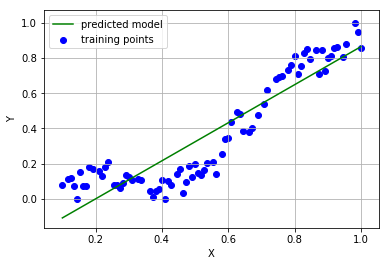

In [0]:
def calculate_loss(weights):
    pred = np.dot(weights, train_x.T)
    loss = (1/2)*np.sum((pred - train_y.T) ** 2).mean()
    return loss


def plot_results(X, y, c, label):
    plt.plot(data_x[:,1], data_x.dot(weights.T), c='g', label='predicted model')
    plt.scatter(X[:,1], y, c=c, label=label)
    plt.grid()
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


from autograd import grad
grad_cost = grad(calculate_loss)

W = np.random.randn()
b =np.random.randn()
weights = np.array([W, b]).reshape((1, 2))
lr = 0.01
tolerance = 1e-5
                   
# Perform Gradient Descent
Epochs = 1
while True:
    loss = calculate_loss(weights)
    new_w = weights - lr * grad_cost(weights)                
    
    # Stopping Condition
    if np.sum(abs(new_w - weights)) < tolerance:
        print("Converged.")
        break
    
    # Print loss every 100 iterations
    if Epochs % 100 == 0:
        print("Epoch: %d - Loss: %.4f" %(Epochs, loss))
    
    Epochs += 1
    weights = new_w

print("weights =",weights)                 
plot_results(train_x, train_y, 'b', 'training points')

## Plot results

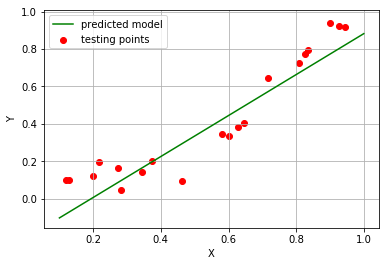

In [0]:
plot_results(test_x, test_y, 'r','testing points')